In [4]:
import os

import numpy as np
import pandas as pd
import statsmodels as sm
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)

from sklearn import preprocessing, neighbors, grid_search, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [5]:
df = pd.read_csv(os.path.join('../10', 'datasets', 'abalone.csv'))

In [6]:
df.columns

Index([u'Sex', u'Length', u'Diameter', u'Height', u'WholeWeight',
       u'ShuckedWeight', u'VisceraWeight', u'ShellWeight', u'Rings'],
      dtype='object')

In [10]:
X = df.drop('Sex', axis=1, inplace=False)
y = df.Sex

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e6f2b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11438e650>]], dtype=object)

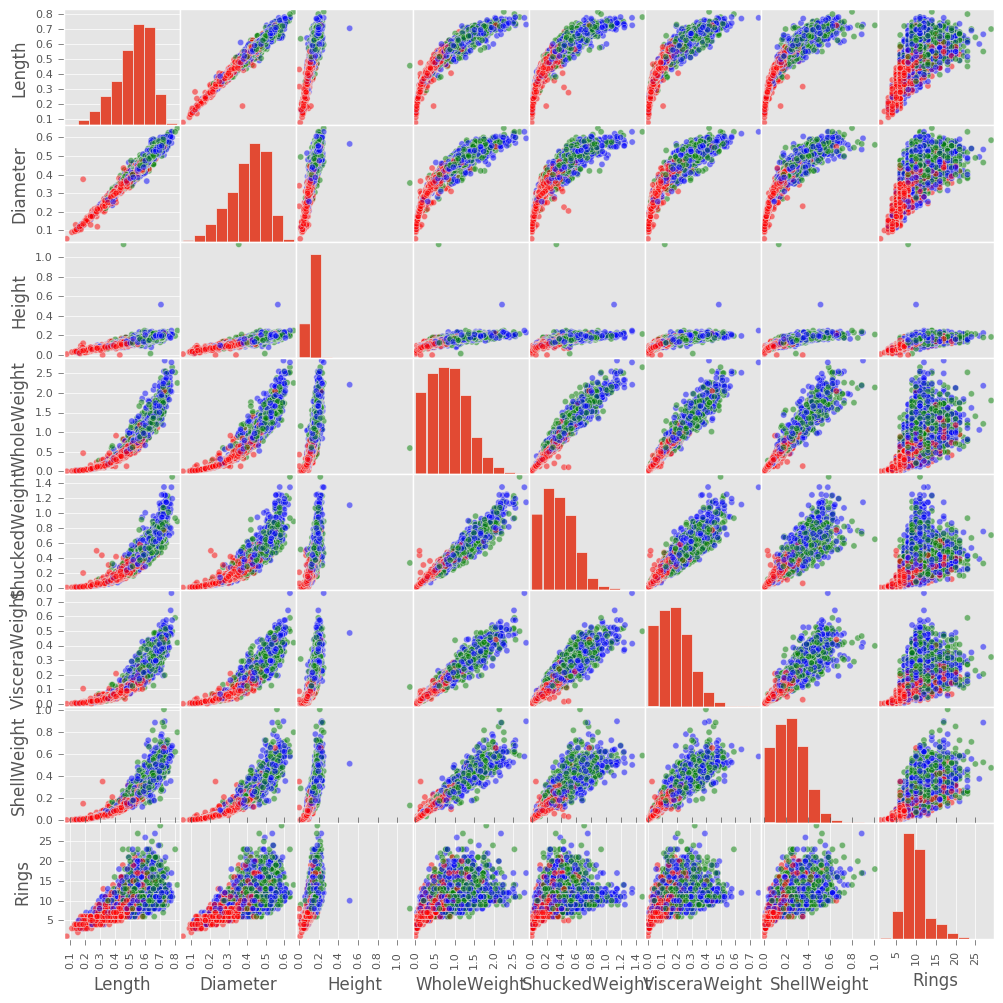

In [12]:
color_wheel = {"I": "red", 
               "M": "blue", 
               "F": "green"}
color = y.map(color_wheel)
pd.tools.plotting.scatter_matrix(X[[u'Length', u'Diameter', u'Height', u'WholeWeight',
       u'ShuckedWeight', u'VisceraWeight', u'ShellWeight', u'Rings']], c=color, s=80, figsize = (12,12))

In [20]:
df_part = df['ShuckedWeight']+df['VisceraWeight']+df['ShellWeight']

In [24]:
df['Shucked_Viscera_Shell'] = df_part

In [27]:
df[['WholeWeight', 'Shucked_Viscera_Shell']]

,WholeWeight,Shucked_Viscera_Shell
0,0.5140,0.4755
1,0.2255,0.2180
2,0.6770,0.6080
3,0.5160,0.4845
4,0.2050,0.1840
5,0.3515,0.3385
6,0.7775,0.7085
7,0.7680,0.7035
8,0.5095,0.4940
9,0.8945,0.7855


In [28]:
df_whole_diff = df.WholeWeight - df.Shucked_Viscera_Shell

In [29]:
df['Whole_diff'] = df_whole_diff

In [30]:
df[['WholeWeight', 'Shucked_Viscera_Shell', 'Whole_diff']]

,WholeWeight,Shucked_Viscera_Shell,Whole_diff
0,0.5140,0.4755,0.0385
1,0.2255,0.2180,0.0075
2,0.6770,0.6080,0.0690
3,0.5160,0.4845,0.0315
4,0.2050,0.1840,0.0210
5,0.3515,0.3385,0.0130
6,0.7775,0.7085,0.0690
7,0.7680,0.7035,0.0645
8,0.5095,0.4940,0.0155
9,0.8945,0.7855,0.1090


In [31]:
df.columns

Index([u'Sex', u'Length', u'Diameter', u'Height', u'WholeWeight',
       u'ShuckedWeight', u'VisceraWeight', u'ShellWeight', u'Rings',
       u'Shucked_Viscera_Shell', u'Whole_diff'],
      dtype='object')

In [32]:
import math
df_volume = math.pi * df.Length/2 * df.Diameter/2 * df.Height 

In [33]:
df['Volume'] = df_volume

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e1f3c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117616310>]], dtype=object)

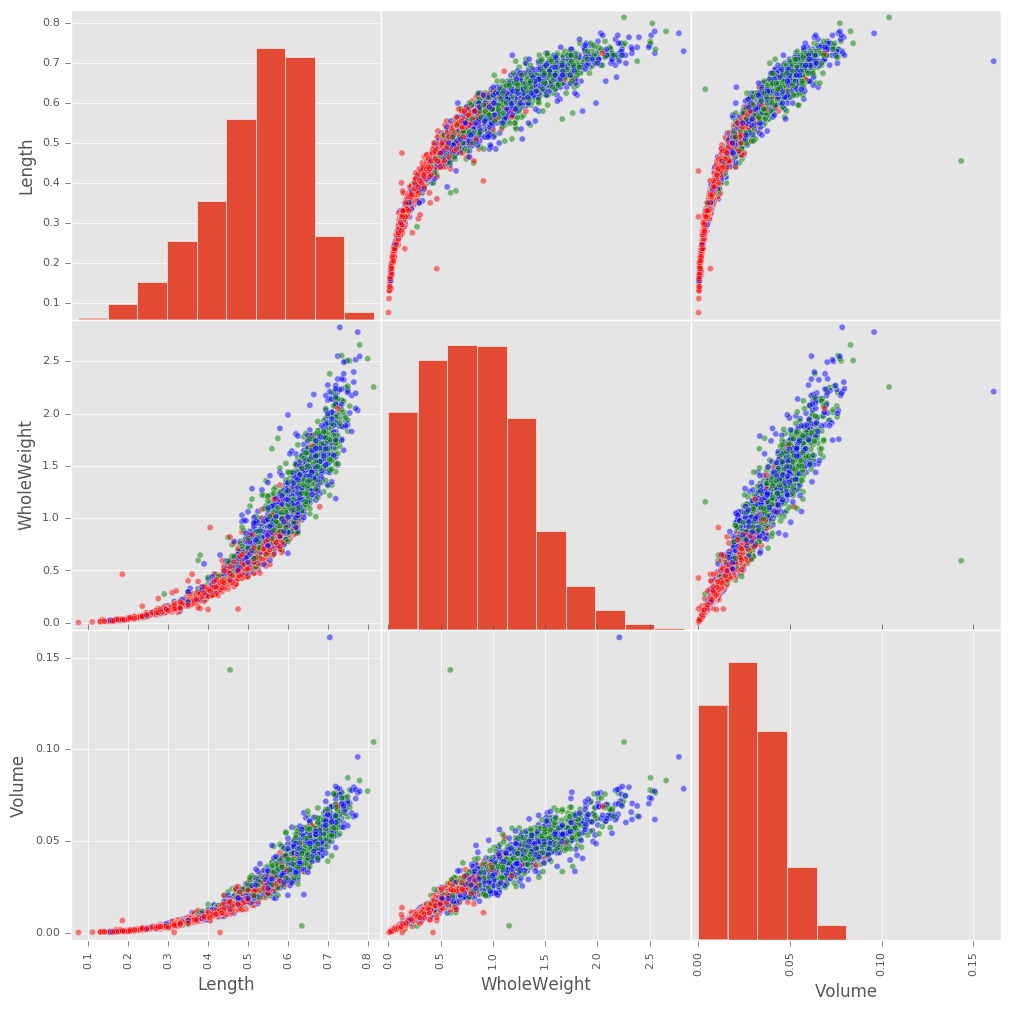

In [37]:
X = df.drop('Sex', axis=1, inplace=False)
y = df.Sex
pd.tools.plotting.scatter_matrix(X[['Length', 'WholeWeight', 'Volume']], c=color, s=80, figsize = (12,12))

In [38]:
df.columns

Index([u'Sex', u'Length', u'Diameter', u'Height', u'WholeWeight',
       u'ShuckedWeight', u'VisceraWeight', u'ShellWeight', u'Rings',
       u'Shucked_Viscera_Shell', u'Whole_diff', u'Volume'],
      dtype='object')

In [39]:
df_density = df.WholeWeight / df.Volume

In [40]:
df['Density'] = df_density

In [ ]:
ff

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1374d5550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13e705410>]], dtype=object)

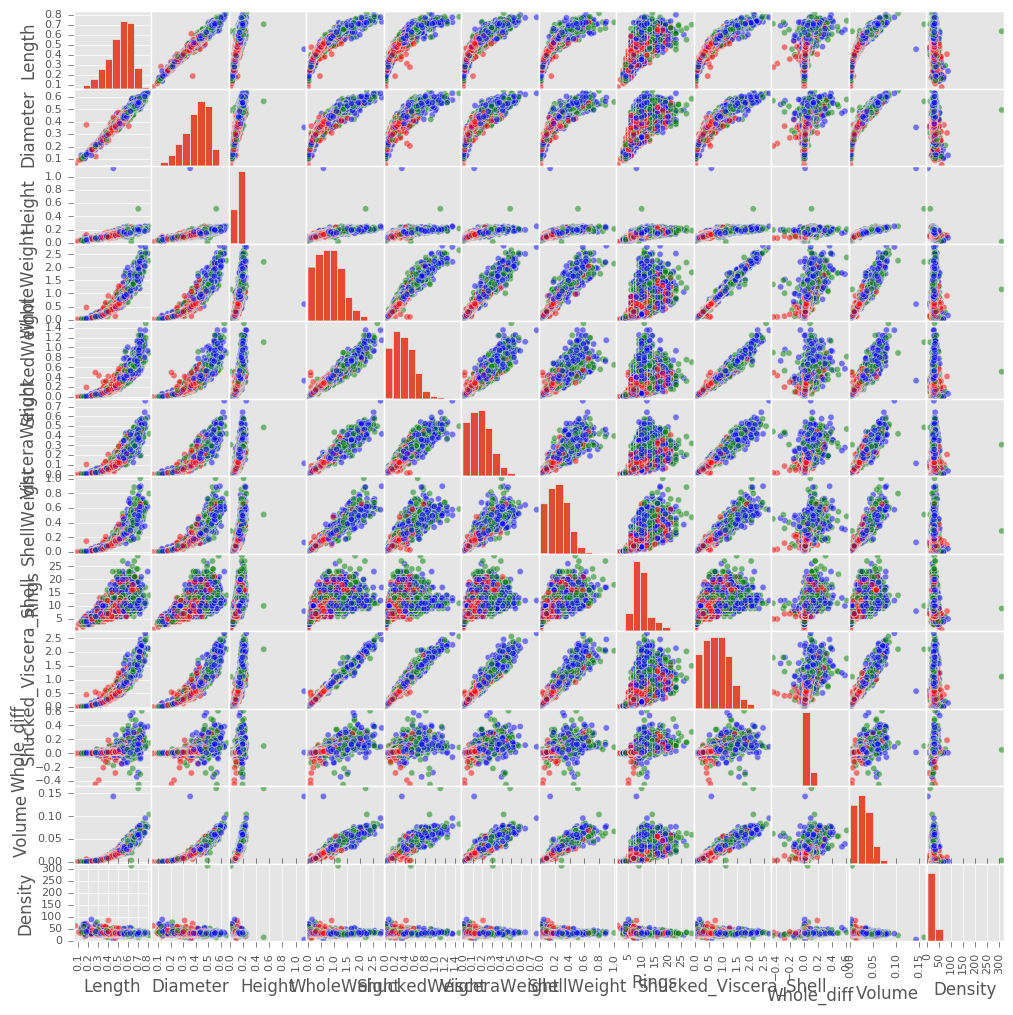

In [57]:
df.drop(df[df.Volume == 0].index, inplace=True)
X = df.drop('Sex', axis=1, inplace=False)
y = df.Sex
pd.tools.plotting.scatter_matrix(X[df.drop('Sex', axis=1, inplace=False).columns], c=color, s=80, figsize = (12,12))

In [42]:
df_density.d

0       41.480633
1       34.395390
2       28.684010
3       32.726855
4       38.772149
5       36.948912
6       30.005115
7       33.773486
8       29.529015
9       31.375008
          ...    
4167    30.933020
4168    30.409410
4169    30.488677
4170    34.766128
4171    29.593165
4172    26.920854
4173    35.095286
4174    25.628236
4175    30.648757
4176    32.286769
dtype: float64

In [68]:
X = df.drop('Sex', axis=1, inplace=False)[['Rings', 'Volume', 'Density']]
c = df.Sex
train_X, test_X, train_c, test_c = cross_validation.train_test_split(X, c, test_size=0.4, random_state=0)

4 features max: Rings, Volume, Density 

In [69]:
scaler = preprocessing.MinMaxScaler().fit(train_X)
train_X = scaler.transform(train_X)

In [73]:
model = neighbors.KNeighborsClassifier().fit(train_X, train_c)

In [76]:
c_hat = model.predict(train_X)


In [79]:
(c_hat != train_c).sum()

800

In [80]:
pd.DataFrame({'train_c': train_c, 'c_hat': c_hat})

,c_hat,train_c
3909,M,F
3364,M,M
4104,F,F
4092,F,F
3075,F,F
653,M,M
3751,I,I
1468,I,M
48,I,I
318,F,F
